**Cleaning Tweets Pipeline**

This notebook takes the twitter files as inputs in the csv format, cleans the text column and does some EDA on the text and hashtag columns by building the wordcloud

**Input**: Twitter files in csv format

**Output**: Titter files in csv format with cleaned text column


**Output data**: final_cleaned_data_pipeline.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#importing twitter data which are in 2 files

df1 = pd.read_csv('/dbfs/FileStore/consolidated.csv')
df2 = pd.read_csv('/dbfs/FileStore/consolidated2.csv')

/databricks/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,9,18,30,31,35) have mixed types. Specify dtype option on import or set low_memory=False.
 interactivity=interactivity, compiler=compiler, result=result)
/databricks/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,9,10,11,13,18,19,20,21,24,27,30,31,32,33,34,35,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
 interactivity=interactivity, compiler=compiler, result=result)

**For the pipeline purpose we will just use the text column which has tweets and ignore all the other columns. Lets drop all the duplicates and keep only the relevant columns like text, hashtags and the tweet timestamp**

In [5]:
df1.columns

Out[3]: Index(['id', 'contributors', 'coordinates', 'created_at', 'display_text_range',
 'entities', 'extended_entities', 'extended_tweet', 'favorite_count',
 'favorited', 'filter_level', 'geo', 'id_str', 'in_reply_to_screen_name',
 'in_reply_to_status_id', 'in_reply_to_status_id_str',
 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
 'lang', 'matching_rules', 'place', 'possibly_sensitive', 'quote_count',
 'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
 'quoted_status_permalink', 'reply_count', 'retweet_count', 'retweeted',
 'retweeted_status', 'scopes', 'source', 'text', 'truncated', 'country',
 'region', 'user_id', 'hashtags'],
 dtype='object')

In [6]:
df1 = df1[['created_at', 'text', 'hashtags']]

In [7]:
df2.columns

Out[5]: Index(['id', 'contributors', 'coordinates', 'created_at', 'display_text_range',
 'entities', 'extended_entities', 'extended_tweet', 'favorite_count',
 'favorited', 'filter_level', 'geo', 'id_str', 'in_reply_to_screen_name',
 'in_reply_to_status_id', 'in_reply_to_status_id_str',
 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
 'lang', 'matching_rules', 'place', 'possibly_sensitive', 'quote_count',
 'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
 'quoted_status_permalink', 'reply_count', 'retweet_count', 'retweeted',
 'scopes', 'source', 'text', 'truncated', 'country', 'region', 'user_id',
 'hashtags'],
 dtype='object')

In [8]:
df2 = df2[['created_at', 'text', 'hashtags']]

In [9]:
df1.shape

Out[7]: (233203, 3)

In [10]:
df2.shape

Out[8]: (284107, 3)

In [11]:
df1.text.nunique()

Out[9]: 227186

In [12]:
df2.text.nunique()

Out[10]: 211388

In [13]:
df2.nunique()

Out[11]: created_at 211195
text 211388
hashtags 57647
dtype: int64

In [14]:
df1.drop_duplicates(subset = 'text', inplace = True)

In [15]:
df2.drop_duplicates(subset = 'text', inplace = True)

In [16]:
df1.reset_index(drop = True, inplace = True)

In [17]:
df2.reset_index(drop = True, inplace = True)

In [18]:
df1.index

Out[16]: RangeIndex(start=0, stop=227187, step=1)

In [19]:
df2.index

Out[17]: RangeIndex(start=0, stop=211389, step=1)

In [20]:
 df = pd.concat([df1, df2])

In [21]:
df.head()

,created_at,text,hashtags
0,2020-01-16 23:57:08,With law enforcement cracking down on our use ...,drones
1,2020-01-16 23:56:22,RT @MITREcorp: We’re researching ways to accel...,NaN
2,2020-01-16 23:53:15,RT @JVGKabala: #rpas @INAC_Venezuela continua ...,rpas
3,2020-01-16 23:51:01,It's a bird! It's a plane! No it's @UPS and @C...,Drones
4,2020-01-16 23:46:15,#Drones and accessories visit our online store...,Drones


In [22]:
df.reset_index(drop = True, inplace = True)

In [23]:
df['text'].nunique()

Out[21]: 438409

In [24]:
df.drop_duplicates(subset = 'text', inplace = True)

In [25]:
df.reset_index(drop = True, inplace = True)

In [26]:
#final tweets table prepared to be cleaned after removing all the duplicates and doing the sanity check

df

,created_at,text,hashtags
0,2020-01-16 23:57:08,With law enforcement cracking down on our use ...,drones
1,2020-01-16 23:56:22,RT @MITREcorp: We’re researching ways to accel...,NaN
2,2020-01-16 23:53:15,RT @JVGKabala: #rpas @INAC_Venezuela continua ...,rpas
3,2020-01-16 23:51:01,It's a bird! It's a plane! No it's @UPS and @C...,Drones
4,2020-01-16 23:46:15,#Drones and accessories visit our online store...,Drones
5,2020-01-16 23:44:43,RT @excel_drones: Time flies when you’re flyin...,excel|drones
6,2020-01-16 23:42:15,RT @bureau_web: Welcome @AerialMediaPros to th...,drones
7,2020-01-16 23:40:01,Another Win for Altitude Angel: Unmanned Traff...,drones|drone|UAV
8,2020-01-16 23:39:18,RT @FhP_AICOS: In this week’s Thursdays with S...,Fraunhofer|AICOS
9,2020-01-16 23:37:22,Time flies when you’re flying.\n\n📸\n@asdetroi...,excel|drones


**Now, let us create a cleaning function. We will remove all the non-alphanumeric texts like punctuations etc. We will also remove the tags using beautiful soup and expand the shortened words like isn't into is not.**

In [28]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [29]:
pip install python-Levenshtein

%pip install python-Levenshtein is not supported in Databricks notebooks.
 To modify the environment on driver only, you can use %sh. To modify the environment on driver and executors use library utilities. Run dbutils.library.help() for documentation on Databricks library utilities.

In [30]:
#cleaning function

def textCleaning(text):
    """ 
         Summary: 
         Clean text data by removing http/www links, alphanumerics etc, making text in lowercase and removing leading and tailing white spaces.
       
         Parameters: 
         text (is passed in a loop), this function requires a series of input, hence this requires a loop (created in the next cell).
         
         Returns:
         Cleaned text
    """
    
    
    filters = r'@[A-Za-z0-9_]+|https?://[^ ]+|www.[^ ]+'

    # Creating a dictionary for unshortten words
    my_dictionary = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not", "rt":''}

    myDictionary_pattern = re.compile(r'\b(' + '|'.join(my_dictionary.keys()) + r')\b')
  
    text = str(text)
    
    #Beautiful Soup is a Python package for parsing HTML and XML documents.
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
        
    #Filtering with our customized filter that we created
    stripped = re.sub(filters, '', bom_removed)
    lower_case = stripped.lower()
    dictionary_handled = myDictionary_pattern.sub(lambda x: my_dictionary[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", dictionary_handled)
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    
    return (" ".join(words)).strip()

In [31]:

#running the above cleaning function

nums = df.shape[0]
print ("Cleaning and parsing the tweets...\n")

#creating empty list
clean_tweet_texts = []

#Passing texts of our dataframe in loop
for i in range(nums):
    if((i+1)%100000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums ))   
        
        #collecting cleaned text in a list
    clean_tweet_texts.append(textCleaning(df['text'].iloc[i]))
print('Pro-processing done 👍🏼')

Cleaning and parsing the tweets...

Tweets 100000 of 438410 has been processed
Tweets 200000 of 438410 has been processed
Tweets 300000 of 438410 has been processed
/databricks/python/lib/python3.6/site-packages/bs4/__init__.py:398: UserWarning: "https://t.co/bQGz04dytl
#agtech#drones" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
 markup
Tweets 400000 of 438410 has been processed
Pro-processing done 👍🏼

In [32]:
# Passing cleaned text from list to original dataframe
df['text'] = pd.DataFrame(clean_tweet_texts,columns=['text'])
df['text'].head(20)

Out[29]: 0 with law enforcement cracking down on our use ...
1 we re researching ways to accelerate advanced ...
2 rpas continua la vanguardia de la tecnolog par...
3 it bird it plane no it and delivering prescrip...
4 drones and accessories visit our online store ...
5 time flies when you re flying excel drones
6 welcome to the wmb family we are happy to be f...
7 another win for altitude angel unmanned traffi...
8 in this week thursdays with science fraunhofer...
9 time flies when you re flying excel drones
10 the latest quadcopter daily news com thanks to...
11 introducing the small format drone and utility...
12 this drone can follow and record you from the ...
13 australia should get some dutch american subma...
14 we are proud to train africa researchers and p...
15 the global drone market is projected to reach ...
16 this audi self driving is equipped with drones...
17 these tiny drones are seriously impressive by ...
18 que pasar si pusieras un dron en funcionamient...
19 faa warns super bowl liv is no drone zone dron...
Name: text, dtype: object

**Cleaning the hashtags**

In [34]:
#running the above cleaning function
nums = df.shape[0]
print ("Cleaning and parsing the hashtags...\n")

#creating empty list
clean_tweet_hashtags = []

#Passing texts of our dataframe in loop
for i in range(nums):
    if((i+1)%100000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums ))   
        
        #collecting cleaned text in a list
    clean_tweet_hashtags.append(textCleaning(df['hashtags'].iloc[i]))
print('Pro-processing done 👍🏼')

Cleaning and parsing the hashtags...

Tweets 100000 of 438410 has been processed
Tweets 200000 of 438410 has been processed
Tweets 300000 of 438410 has been processed
Tweets 400000 of 438410 has been processed
Pro-processing done 👍🏼

In [35]:
# Passing cleaned text from list to original dataframe
df['hashtags'] = pd.DataFrame(clean_tweet_hashtags,columns=['hashtags'])
df['hashtags'].head(20)

Out[31]: 0 drones
1 nan
2 rpas
3 drones
4 drones
5 excel drones
6 drones
7 drones drone uav
8 fraunhofer aicos
9 excel drones
10 tomtop drones
11 drones
12 drone drones iot ai autonomous tech
13 australia submarines drones
14 africa drones precision ag
15 drone iot robotics
16 ai robotics drones
17 drones innovation tech robotics automation mobile
18 nan
19 drones drone uav
Name: hashtags, dtype: object

**Sometimes, after cleaning, there might still be some duplicates after removing all the punctuations, so let's do the sanity check**.

In [37]:
#sanity check

df['text'].nunique()

Out[32]: 354323

In [38]:
df['text'].value_counts()

Out[33]: lenovo is giving away instant win prizes like smart bulbs nest thermostats drones more sweepstakes 2711
alan watch the skies animation art movies stopmotionanimation stopmotion shortfilm 1081
enter daily summer giveaways to win drones ipads and other epic prizes summerofcharm sweepstakes 1010
 964
super offer drones and accessories visit take breathtaking videos with this drone 851
love drones check this deal 576
drones and accessories visit our online store where you will find all types of professiona 457
create your own star wars adventure with collectible drone from enter to win on mommymoment 435
sign up at to earn money with your drone dji drones aerialphotography djiphantom 426
things are taking off in mega giveaway entered to win an air hogs dr fpv race drone have 397
dji announces mavic smart controller with built in screen learn more here today 389
ladygaga this show had everything from flying drones and poker face to piano solo and dramatic jump off the 341
counter drone company dedrone attracts million in new funds drones security 292
drones will impact my business gartnersym and intel ask which key tech trend will impact yours 289
ve entered to win an air wars battle drones from enter for your chance here 264
dreaming as an occupation but it no picnic lenders by by 240
amazon reviewer larry johnson said by the end of the novel it had me believing in some astounding possibilities 235
amazon reviewer katie said it stuck with me while this one if you like movies like inception or the matrix 234
clone drones an exciting page turner with twisting plot the wishing shelf book awards link 233
bioprints cutting edge technology meets classic detective fiction iartg kindle 230
entered to win free drone from half chrome drones drones freedrone 199
fly high with the rourke series link books iartg kindle amazon readindie 193
mobsters gangs zombies oh my link books iartg kindle amazon readindie 190
utilizing drones for your commercial real estate cre drones 186
drones have now become one of the most popular connected objects worldwide and it is not difficult to understand wh 169
just entered prize giveaway drones win fishbowlprizes 167
the latest drone news daily thanks to drones drone 164
do you have news to share get it published drones uav 156
ua systems ltd hawaii based aerial photography videography geospatial mapping cinema aerial filming services 150
checkitout drones the ultimate guide on our blog at or buyitnow on amazon at 150
 ... 
basically you belong to an endian father yes we are not sending troops in kashmir 1
the race for deep sea mining is already on even though the reservoir of biodiversity in the deep ocean is poorly 1
hottest emerging industries to watch in ai drones influencers 1
ai powered drone software company scores seed funding droneschool drones 1
cosmicchanges added spy drones to the clan virtual war 1
tonight we dropped in to cowes business tvc and leant about how drones can spot worn out solar panels amongst othe 1
drones are now used in searching for missing people les drones sont maintenant utilis pour rechercher les person 1
zipp nano auto takeoff works but no manual drone uav 1
cheshirehour looking for something to promote your event using mixture of drones land based cameras tim 1
pentagon official warns china exporting killer ai drones to middleeast when the us had monopoly on everyt 1
drones and boats just go together dronestagram droneoftheday dronephotography droneshot dji mavicpro 1
and the saudiarabia use usa military weapons to comitt genocide in yemen by the way how did isis get all those drones 1
rafael moves into the uav world drone drones uas uav rpas sar dronerental 1
robotix spruces up its seadrone underwater robo craft drone drones gears 1
the market for agricultural drones is really taking off and predicted to grow to nearly billion year thanks 1
best drone photographs of via geospatial 1
video of the week rainbow mountain peru drones usa tech airvuz amazingfootage 1
poor

**We can see that there are some duplicates. Let's drop them, reset our index and then we will be done with cleaning**

In [40]:
df.drop_duplicates(subset = 'text', inplace = True)

In [41]:
df.reset_index(drop = True, inplace = True)

In [42]:
df

,created_at,text,hashtags
0,2020-01-16 23:57:08,with law enforcement cracking down on our use ...,drones
1,2020-01-16 23:56:22,we re researching ways to accelerate advanced ...,nan
2,2020-01-16 23:53:15,rpas continua la vanguardia de la tecnolog par...,rpas
3,2020-01-16 23:51:01,it bird it plane no it and delivering prescrip...,drones
4,2020-01-16 23:46:15,drones and accessories visit our online store ...,drones
5,2020-01-16 23:44:43,time flies when you re flying excel drones,excel drones
6,2020-01-16 23:42:15,welcome to the wmb family we are happy to be f...,drones
7,2020-01-16 23:40:01,another win for altitude angel unmanned traffi...,drones drone uav
8,2020-01-16 23:39:18,in this week thursdays with science fraunhofer...,fraunhofer aicos
9,2020-01-16 23:37:02,the latest quadcopter daily news com thanks to...,tomtop drones


In [43]:
df.to_csv('/dbfs/FileStore/tables/cleaned_drones_pipeline.csv')

**Let's build wordclouds for tweets as well as hashtags**

In [45]:
from wordcloud import WordCloud, STOPWORDS
def getWordCloud(data):

    k= (' '.join(data))
    wordcloud = WordCloud(background_color = 'White', width = 1000, height = 500,collocations=False).generate(k)
    plt.figure(figsize=(15,5))
    plt.imshow(wordcloud)
    plt.axis('off')
    display(plt.show())

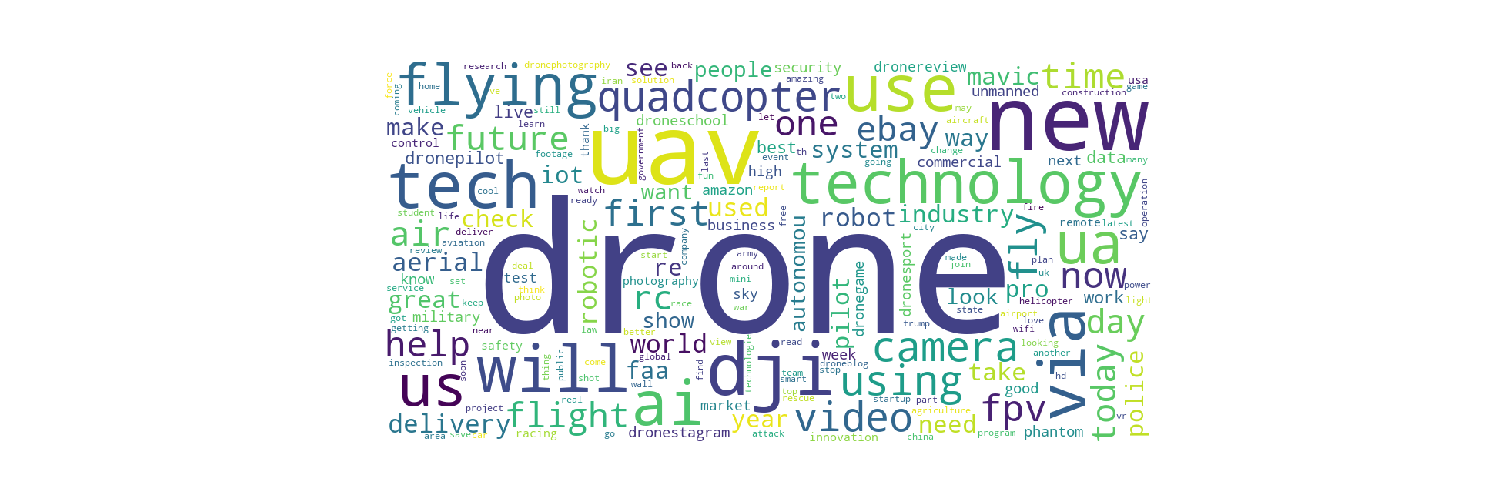

In [46]:
#top occuring words in tweets

getWordCloud(df.text[df.text!='nan'])

In [47]:
df.hashtags = df.hashtags.astype('str')

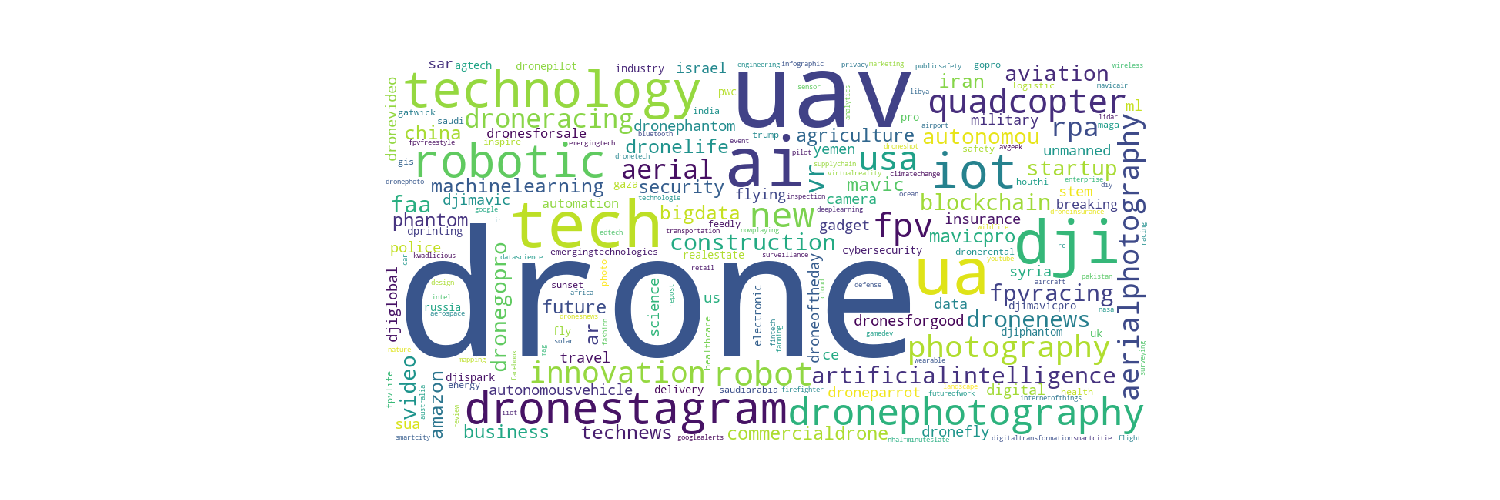

In [48]:
#Top occuring hashtaags

getWordCloud(df.hashtags[df.hashtags!='nan'])